In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

plt.style.use('seaborn')

from astropy.io import fits

In [109]:
# hsc-ssp pdr3 wide spectroscopic database
# file = '../../../data/spec_data/x.fits'
# file = '../../../data/spec_data/sdss_dr18_specz.fits'
# file = '../../../data/spec_data/hsc_ssp_pdr3_wide_specz.fits'

# with fits.open( file ) as fits_file:
#     # fits_file.verify( 'fix' )
#     data = fits_file[1].data
#     cols = fits_file[1].columns
#     # print( fits_file[1].header )

#     df = { col: data[ col ] for col in fits_file[1].columns.names }
#     df = pd.DataFrame( df )

# df
# cols

In [144]:
file = '../../../data/spec_data/hsc_ssp_pdr3_wide_specz.csv'

df = pd.read_csv( file, header = 0 )

df = df.query( 'specz_redshift_err < 0.001' ).dropna()
df

,# object_id,specz_id,specz_ra,specz_dec,specz_redshift,specz_redshift_err,specz_flag_sdss_dr15,g_cmodel,r_cmodel,i_cmodel,z_cmodel,y_cmodel,g_cmodel_err,r_cmodel_err,i_cmodel_err,z_cmodel_err,y_cmodel_err
0,36411585979242254,3424437,30.511322,-6.473226,2.874560,0.000378,True,21.155132,21.268188,20.880272,21.026001,20.584827,0.003602,0.004713,0.003153,0.006963,0.009987
2,36420927533106356,3405263,32.734531,-6.651227,1.862459,0.000929,True,21.774145,21.598530,21.084198,21.156345,21.022526,0.005278,0.006420,0.003586,0.007990,0.016133
7,36437828229413207,1719372,39.497032,-6.859938,0.190211,0.000024,True,18.484444,17.329926,16.856525,16.546036,16.390755,0.001343,0.000833,0.000838,0.000645,0.001412
15,37476170932967092,1719823,31.413725,-5.750653,0.494081,0.000143,True,22.352314,20.726929,19.846298,19.449375,19.279060,0.009513,0.003135,0.001399,0.001912,0.003421
17,37476467285710451,3425961,31.114579,-4.866355,0.510229,0.000159,True,22.376370,20.640554,19.657524,19.266718,19.110783,0.015317,0.007203,0.001599,0.001997,0.003766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013663,74648876656654531,4210209,214.272246,52.484233,0.763232,0.000130,False,24.650238,24.289406,24.074270,23.983608,23.936228,0.026417,0.039256,0.029896,0.068440,0.151912
1013665,74648880951618970,4176568,214.553805,52.593960,1.085394,0.000077,False,24.598068,23.859047,23.352942,22.807362,22.430328,0.029671,0.032531,0.016114,0.028539,0.049028
1013667,74649009800643353,4174717,214.009623,52.312917,0.484039,0.000029,False,23.357530,21.864660,21.314297,20.960560,20.545433,0.011118,0.006139,0.003344,0.006404,0.011242
1013668,74649018390549599,4211476,214.248147,52.608987,0.695057,0.000004,False,24.356690,23.822350,23.343487,23.162842,23.235107,0.020589,0.026863,0.012714,0.033892,0.094311


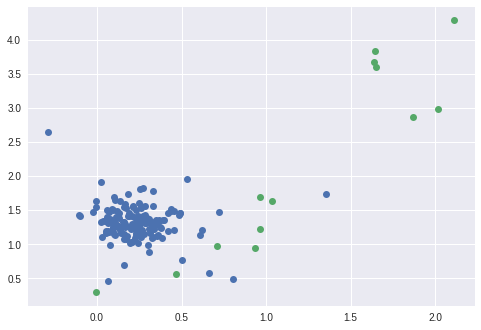

In [146]:
# for 2.5 <= z <= 3.5
z  = df['specz_redshift'].to_numpy()
gr = (df['g_cmodel'] - df['r_cmodel']).to_numpy()
ri = (df['r_cmodel'] - df['i_cmodel']).to_numpy()

mask = (3.9 <= z) & (z <= 4.1)
mask1 = (4.9 <= z) & (z <= 5.1)
# mask1 = (3 > z)
# plt.plot( ri[ mask1 ], gr[ mask1 ], 'o' )
plt.plot( ri[ mask ], gr[ mask ], 'o' )
plt.plot( ri[ mask1 ], gr[ mask1 ], 'o' )